Tensor

### 1. *gradients*


In [ ]:
import torch
import numpy as np
# f = w * x
# f = 2 * x
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
# model prediction
def forward(x):
  return w * x
# loss = MSE
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()
#gradient
#MSE = 1/N*(w*x - y)**2
#dJ/dw = 1/N 2x(w*x-y)
def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted-y).mean()
print(f'prediction befor training: f(5) = {forward(5):.3f}')
#training
learning_rate = 0.01
n_iters = 10
for epoch in range(n_iters):
  #prediction  = forward pass
  y_pred = forward(X)
  #loss 
  l = loss(Y, y_pred)
  #gradients = backward pass
  l.backward() # dl/dw
  #update weights
  with torch.no_grad():
    w -= learning_rate * w.grad
  # zero gradients
  w.grad.zero_()
  if epoch %1==0:
    print(f'epoch {epoch+1}:w = {w:.3f}, loss={l:.8f}')
print(f'prediction after training: f(5) = {forward(5):.3f}')

### Training Pipeline

1. Design Model (input, output size, forward pass)
2. Construct loss and optimizer
3. Training loop
  - forward pass: compute prediction
  - backward: gradients
  - update weights

In [ ]:
import torch.nn as nn
import torch
# f = w * x
# f = 2 * x
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

X_test = torch.tensor([5], dtype=torch.float32)
n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
  
  def __init__(self, input_dim, output_dim):
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)
  
  def forward(self, x):
    return self.lin(x)

model = LinearRegression(input_size, output_size)

print(f'prediction befor training: f(5) = {model(X_test).item():.3f}')
#training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  #prediction  = forward pass
  y_pred = model(X)
  #loss 
  l = loss(Y, y_pred)
  #gradients = backward pass
  l.backward() #dl/dw
  #update weights
  optimizer.step()
    # zero gradients
  optimizer.zero_grad()
  if epoch %10==0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}:w = {w[0][0].item():.3f}, loss={l:.8f}')
print(f'prediction after training: f(5) = {model(X_test).item():.3f}')

4 1
prediction befor training: f(5) = 1.681
epoch 1:w = 0.544, loss=20.14679337
epoch 11:w = 1.577, loss=0.59351128
epoch 21:w = 1.749, loss=0.08341482
epoch 31:w = 1.782, loss=0.06625600
epoch 41:w = 1.792, loss=0.06208117
epoch 51:w = 1.799, loss=0.05845952
epoch 61:w = 1.805, loss=0.05505668
epoch 71:w = 1.811, loss=0.05185211
epoch 81:w = 1.817, loss=0.04883402
epoch 91:w = 1.822, loss=0.04599161
prediction after training: f(5) = 9.643


### Linear Regression

epoch: 10, loss = 4371.3906
epoch: 20, loss = 3262.1052
epoch: 30, loss = 2459.3662
epoch: 40, loss = 1877.8456
epoch: 50, loss = 1456.1685
epoch: 60, loss = 1150.1212
epoch: 70, loss = 927.8117
epoch: 80, loss = 766.2034
epoch: 90, loss = 648.6397
epoch: 100, loss = 563.0606


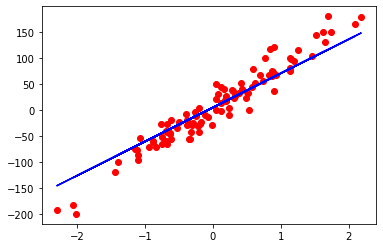

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0. prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y= y.view(y.shape[0], 1)

n_samples, n_features = X.shape
# 1. model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2. Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3.Training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)
  #backward pass
  loss.backward()
  # update
  optimizer.step()
  optimizer.zero_grad()

  if(epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

### Logistic Regression

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# 0. load data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X_train.shape)
print(X_train[0:2])
print(y_train[0:2])
# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train.shape)
print(X_train[0:2])

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

print(X_train[0:2])
print(y_train[0:2])

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1. model
# f = wx * b, sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)

# 2. loss and optimizer
learning_rate = 0.01
critersion=nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forward pass and loss
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()
  
  # updates
  optimizer.step()

  # zero graients
  optimizer.zero_grad()

  if (epoch+1) % 10 ==0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy = {acc:.4f}')


(455, 30)
[[1.288e+01 1.822e+01 8.445e+01 4.931e+02 1.218e-01 1.661e-01 4.825e-02
  5.303e-02 1.709e-01 7.253e-02 4.426e-01 1.169e+00 3.176e+00 3.437e+01
  5.273e-03 2.329e-02 1.405e-02 1.244e-02 1.816e-02 3.299e-03 1.505e+01
  2.437e+01 9.931e+01 6.747e+02 1.456e-01 2.961e-01 1.246e-01 1.096e-01
  2.582e-01 8.893e-02]
 [1.113e+01 2.244e+01 7.149e+01 3.784e+02 9.566e-02 8.194e-02 4.824e-02
  2.257e-02 2.030e-01 6.552e-02 2.800e-01 1.467e+00 1.994e+00 1.785e+01
  3.495e-03 3.051e-02 3.445e-02 1.024e-02 2.912e-02 4.723e-03 1.202e+01
  2.826e+01 7.780e+01 4.366e+02 1.087e-01 1.782e-01 1.564e-01 6.413e-02
  3.169e-01 8.032e-02]]
[1 1]
(455, 30)
[[-0.36180827 -0.26521011 -0.31715702 -0.46713841  1.80382609  1.18174184
  -0.51689239  0.10653677 -0.39005152  1.39140136  0.14370971 -0.12075458
   0.16013008 -0.13255126 -0.58631633 -0.12476339 -0.57865272  0.10906824
  -0.28187354 -0.1889237  -0.25710149 -0.24033176 -0.2441722  -0.36688232
   0.5448709   0.24812607 -0.71088618 -0.07967528 -0.52

### Dataset and DataLoader

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  
  def __init__(self):
    # data loading
    xy = np.loadtxt('/content/9408623/wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]]) # n_samples, 1
    self.n_samples = xy.shape[0]


  def __getitem__(self, index):
      # dataset[0]
      return self.x[index], self.y[index]

  def __len__(self):
    # len(dataset) 
    return self.n_samples

dataset = WineDataset()
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    # forward backward, update
    if (i+1) % 5 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step{i+1}/{n_iterations}, input {inputs.shape}')
  
torchvision.datasets.MNIST()
# fashion-mnist, coco




  

### Dataset Transforms

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np

class WineDataset(Dataset):

  def __init__(self, transform):
    xy = np.loadtxt('/content/9408623/wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.n_samples = xy.shape[0]

    # do not convert to tensor here
    self.x = xy[:, 1:]
    self.y = xy[:, [0]]
    
    self.transform = transform

  def __getitem__(self, index):
    sample = self.x[index], self.y[index]

    if self.transform:
      sample = self.transform(sample)
    return sample
  
  def __len__(self):
    return self.n_samples

class ToTensor:
  def __call__(self, sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
  def __init__(self, factor):
    self.factor = factor
  
  def __call__(self, sample):
    inputs, target = sample
    inputs *= self.factor
    return inputs, target

dataset = WineDataset(transform=None)

first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(features)
print(type(features), type(labels))




[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03])
<class 'torch.Tensor'> <class 'torch.Tensor'>


### Softmax and Croo-Entropy


In [2]:
import torch
import torch.nn as nn
import numpy as np

# Softmax
def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print('softmax numpy: ', outputs)

x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
print(outputs)

# Cross-Entropy
def cross_entropy(actual, predicted):
  loss = -np.sum(actual * np.log(predicted))
  return loss

Y = np.array([1, 0, 0])
Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.3, 0.6])
l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}')
print(f'Loss2 numpy: {l2:.4f}')

loss = nn.CrossEntropyLoss()
# 3 sample 
Y = torch.tensor([2, 0, 1])
# n_sample x nclasses = 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]])
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 0.1], [0.1, 3.0, 0.1]])
l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)
print(l1.item())
print(l2.item())

_, prediction1 = torch.max(Y_pred_good, 1)
_, prediction2 = torch.max(Y_pred_bad, 1)
print(prediction1)
print(prediction2)

softmax numpy:  [0.65900114 0.24243297 0.09856589]
tensor([0.6590, 0.2424, 0.0986])
Loss1 numpy: 0.3567
Loss2 numpy: 2.3026
0.3018244206905365
1.3278342485427856
tensor([2, 0, 1])
tensor([0, 1, 1])


In [3]:
# Multiclass problem
import torch
import torch.nn as nn

# option 1 (create nn modules)
class NeuralNet1(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet1 , self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    # no softmax in the end
    return out

model = NeuralNet1(input_size = 28*28, hidden_size=5, num_classes=3)
criterion =   nn.BCELoss() #(applies softmax)

# option 2 (use activation functions driectly in forward pass)
class NeuralNet2(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out = torch.relu(self.linear1(x))
    out = torch.sigmoid(self.linear2(out))
    return out

### Feed Forward Net
1. MNIST
2. Dataloader, Transform
3. Multilayer, Neural Net, activation function
4. loss and optimizer
5. traning and loop (batch training)
6. model evaluation
7. GPU support

In [1]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='/content/data', train=True,
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='/content/data', train=False,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                      shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                      shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

# for i in range(6):
#   plt.subplot(2, 3, i+1)
#   plt.imshow(samples[i][0], cmap='gray')
# plt.show()

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes)

# loss and opitimize
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# train loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28)
    labels = labels

    # forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
  
# test 
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    labels = labels
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')


100%|██████████| 9912422/9912422 [00:00<00:00, 162889974.24it/s]

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 105427061.64it/s]


Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 66315313.33it/s]

Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 18622217.76it/s]

Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw



torch.Size([100, 1, 28, 28]) torch.Size([100])
epoch 1 / 2, step 100/600, loss = 0.3214
epoch 1 / 2, step 200/600, loss = 0.3067
epoch 1 / 2, step 300/600, loss = 0.3003
epoch 1 / 2, step 400/600, loss = 0.3744
epoch 1 / 2, step 500/600, loss = 0.2118
epoch 1 / 2, step 600/600, loss = 0.2197
epoch 2 / 2, step 100/600, loss = 0.1764
epoch 2 / 2, step 200/600, loss = 0.2859
epoch 2 / 2, step 300/600, loss = 0.1620
epoch 2 / 2, step 400/600, loss = 0.2682
epoch 2 / 2, step 500/600, loss = 0.1872
epoch 2 / 2, step 600/600, loss = 0.2223
accuracy = 95.0


### CNN

In [4]:
# !pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# hyper-parameters
num_epochs = 4
batch_size = 4
learning_rate = 0.001

# dataset has PILImage image of range[0, 1]
# we transform them to Tensors of normalized range [-1, 1]
# transform = transforms.Compose([transforms.ToTensor(),
#                                 transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='/content/data', train=True,
                                             download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='/content/data', train=False,
                                             download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size,shuffle=False,
                                          num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# examples = iter(train_loader)
# samples, labels = next(examples)
# print(len(examples))

# implement conv Net
class ConvNet(nn.Module):
  def __init__(self):
    super(ConvNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, 5)
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv3 = nn.Conv2d(64, 128, 5)
    self.conv4 = nn.Conv2d(128, 256, 5)
    self.fc1 = nn.Linear(256*2*2, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = torch.relu(self.conv1(x))
    x = self.pool(torch.relu(self.conv2(x)))
    x = torch.relu(self.conv3(x))
    x = self.pool(torch.relu(self.conv4(x)))
    x = x.view(-1, 256*2*2) # Flatten
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x  
    

model = ConvNet()

model = model.to(device)


# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# train loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 4, 3, 32, 32
    # forward
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # if (i+1) % 200 == 0:
    #   print(f'epoch {epoch+1}/{num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
  
# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  n_class_correct = [0 for i in range(10)]
  n_class_samples = [0 for i in range(10)]
  for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    # max return (value, index)
    _, predicted = torch.max(outputs, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    for i in range(batch_size):
      label = labels[i]
      pred = predicted[i]
      if (label == pred):
        n_class_correct[label] += 1
      n_class_samples[label] += 1
  
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc} %')

  for i in range(10):
    acc = 100.0 * n_class_correct[i] / n_class_samples[i]
    print(f'Accuracy of {classes[i]}: {acc} %')


100%|██████████| 170498071/170498071 [00:05<00:00, 28831358.79it/s]


Extracting /content/data/cifar-10-python.tar.gz to /content/data
Files already downloaded and verified
accuracy = 42.06 %
Accuracy of plane: 32.6 %
Accuracy of car: 70.5 %
Accuracy of bird: 15.2 %
Accuracy of cat: 19.2 %
Accuracy of deer: 26.3 %
Accuracy of dog: 33.7 %
Accuracy of frog: 65.3 %
Accuracy of horse: 55.9 %
Accuracy of ship: 60.9 %
Accuracy of truck: 41.0 %


### Tensorboard

In [ ]:
%%capture
!pip install tensorboardcolab

In [ ]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbc = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://544d-35-231-75-29.ngrok.io


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# device config
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# hyper parameters
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root='/content/data', train=True,
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='/content/data', train=False,
                                           transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                      shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                      shuffle=False)

examples = iter(train_loader)
example_data, example_targets = next(examples)

# for i in range(6):
#   plt.subplot(2, 3, i+1)
#   plt.imshow(samples[i][0], cmap='gray')
# plt.show()



class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(NeuralNet, self).__init__()
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# loss and opitimize
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)



# train loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    # 100, 1, 28, 28
    # 100, 784
    images = images.reshape(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)

    # forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')
  
# test 
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)

    # value, index
    _, predictions = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  
  acc = 100.0 * n_correct / n_samples
  print(f'accuracy = {acc}')


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/data/MNIST/raw/train-images-idx3-ubyte.gz to /content/data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/data/MNIST/raw/train-labels-idx1-ubyte.gz to /content/data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/data/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/data/MNIST/raw

epoch 1 / 2, step 100/600, loss = 0.4575
epoch 1 / 2, step 200/600, loss = 0.3490
epoch 1 / 2, step 300/600, loss = 0.4071
epoch 1 / 2, step 400/600, loss = 0.2291
epoch 1 / 2, step 500/600, loss = 0.2611
epoch 1 / 2, step 600/600, loss = 0.2377
epoch 2 / 2, step 100/600, loss = 0.1253
epoch 2 / 2, step 200/600, loss = 0.2729
epoch 2 / 2, step 300/600, loss = 0.3240
epoch 2 / 2, step 400/600, loss = 0.1091
epoch 2 / 2, step 500/600, loss = 0.2718
epoch 2 / 2, step 600/600, loss = 0.1775
accuracy = 95.4
